In [ ]:
#OBJECTIVE: My goal in this analysis is to use various clustering techniques to segment the metanalysis done.
#Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. 
#Therefore, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.


In [12]:
#Extensions for Libriaries not yet Downloaded
%conda install -c conda-forge kneed


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [66]:
#Extensions for Libriaries not yet Downloaded
conda install matplotlib numpy pandas seaborn scikit-learn ipython

Solving environment: done

## Package Plan ##

  environment location: /Users/testuser/opt/anaconda3

  added / updated specs:
    - ipython
    - matplotlib
    - numpy
    - pandas
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39hecd8cb5_0         423 KB
    conda-23.3.1               |   py39hecd8cb5_0         962 KB
    jsonpatch-1.32             |     pyhd3eb1b0_0          15 KB
    jsonpointer-2.1            |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  boltons            pkgs/main/osx-64::boltons-23.0.0-py39hecd8cb5_0 
  jsonpatch          pkgs/main/noarch::jsonpatch-1.32-pyhd3eb1b0_0 
  jsonpointer        pkgs/main/noarch::jsonpointer-2.1-pyhd3eb

In [280]:
#LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from kneed import DataGenerator, KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from kneed import KneeLocator
from sklearn.cluster import KMeans, MeanShift, DBSCAN, Birch


from collections import Counter
from pandas.plotting import scatter_matrix

from tqdm import tqdm_notebook


In [208]:
#IMPORTED DATA
data = pd.read_csv('/Users/testuser/Downloads/NationalAndStatePregnancy_PublicUse.csv')

In [209]:
data.head()
#Based upon the output below we see there is a vast amount of data, the next step in the process,
#is to clean the data to expell uncessary values and make the data scalable.

,state,year,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021


In [210]:
data.shape
#912 rows and 103 columns, initial set of data prior to cleaning

(912, 103)

In [212]:
data.dtypes

state                  object
year                    int64
pregnancyratelt15     float64
pregnancyrate1517     float64
pregnancyrate1819     float64
                       ...   
abortionratiototal    float64
miscarriagestotal       int64
pregnanciestotal        int64
notes                  object
versiondate            object
Length: 103, dtype: object

In [213]:
 data = data.drop(['pregnancyratelt15', 'pregnancyrate1517' , 'pregnancyrate1819','pregnancyrate1519','pregnancyrate2024', 'pregnancyrate2529', 'pregnancyrate3034', 'pregnancyrate40plus'], axis=1)
 #removal of pregnancyrate columns   

In [214]:
data.head()

,state,year,pregnancyratelt20,pregnancyrate3539,abortionratelt15,abortionrate1517,abortionrate1819,abortionrate1519,abortionratelt20,abortionrate2024,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,114.3,31.9,8.6,24.0,41.8,31.4,32.9,40.5,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,120.9,32.0,8.6,19.1,38.8,27.2,28.9,38.1,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,106.0,34.6,6.0,12.5,30.9,19.9,21.0,34.6,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,92.1,37.6,3.8,9.3,24.3,15.5,16.2,29.6,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,72.5,40.7,2.9,7.0,19.2,11.9,12.5,23.2,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021


In [215]:
data.shape

(912, 95)

In [ ]:
#CLEANING OF DATA

In [216]:
 data = data.drop(['pregnancyratetotal'], axis=1)
 #removal of pregnancyrate columns   

In [217]:
data.shape

(912, 94)

In [218]:
 data = data.drop(['abortionratelt15', 'abortionrate1517' , 'abortionrate1819','abortionrate1519','abortionrate2024', 'abortionrate2529', 'abortionrate3034', 'abortionrate40plus', 'abortionratetotal'], axis=1)
 #removal of abortionrate columns 


In [219]:
 data = data.drop(['birthratelt15', 'birthrate1517' , 'birthrate1819','birthrate1519','birthrate2024', 'birthrate2529', 'birthrate3034', 'birthrate3539', 'birthrate40plus', 'birthratetotal'], axis=1)
 #removal of birthrate columns  


In [220]:
 data = data.drop(['abortionratiolt15', 'abortionratio1517' , 'abortionratio1819','abortionratio1519','abortionratio2024', 'abortionratio2529', 'abortionratio3034', 'abortionratio3539', 'abortionratio40plus', 'abortionratiototal'], axis=1)
#removal of abortionratio columns


In [221]:
 data = data.drop(['pregnancyratelt20', 'pregnancyrate3539' , 'abortionratelt20','abortionrate3539','birthratelt20', 'abortionratelt20'], axis=1)
#removal pf pregnancyrate columns

In [222]:
 data = data.drop(['abortionratiolt20'], axis=1)

In [223]:
 data = data.drop(['abortionslt20', 'pregnancieslt20', 'birthslt20', 'miscarriageslt20', 'populationlt20' ], axis=1)

In [224]:
 data = data.drop(['abortions1519', 'pregnancies1519', 'births1519', 'miscarriages1519', 'population1519' ], axis=1)

In [225]:
 data = data.drop(['notes', 'versiondate'], axis=1)
#removal of informational columns <ALL COLUMNS NOT NEEDED HAVE BEEN DROPPED>

In [333]:
X_lin = data.drop(['population1544'], axis =1)
y_lin = data[['population1544']]
X_lin_train, X_lin_test, y_lin_train, y_lin_test, train_test_split (X_lin, y_lin, test_size=0.3, random_state=42 )

In [340]:
pred = linear_modal=data(X_lin_test)
pred

In [226]:
data.head()

,state,year,pregnancieslt15,pregnancies1517,pregnancies1819,pregnancies2024,pregnancies2529,pregnancies3034,pregnancies3539,pregnancies40plus,...,population2024,population2529,population3034,population3539,population40plus,population1544,abortionstotal,birthstotal,miscarriagestotal,pregnanciestotal
0,AL,1988,610.0,7440.0,10560.0,30410.0,25890.0,14470.0,4820.0,800.0,...,163053,169778,165953,150994,132391,945017,20100,60745,14160,95000
1,AL,1992,700.0,6820.0,10890.0,30390.0,24210.0,14820.0,5380.0,990.0,...,164977,156176,169904,168060,152130,963462,17720,62260,14220,94200
2,AL,1996,580.0,6370.0,10120.0,27620.0,22430.0,14650.0,6100.0,1150.0,...,156405,156680,161922,176144,167319,979413,14940,60488,13590,89020
3,AL,2000,370.0,5050.0,9360.0,29180.0,23900.0,14690.0,6500.0,1280.0,...,156233,150616,152816,172909,177209,970239,13060,63299,13970,90320
4,AL,2005,280.0,3740.0,7710.0,27130.0,22830.0,15040.0,6290.0,1440.0,...,163672,147499,149728,154736,173653,950989,10840,60453,13170,84470


In [227]:
data.shape

(912, 47)

In [228]:
print(data.describe())

              year  pregnancieslt15  pregnancies1517  pregnancies1819  \
count   912.000000       869.000000       894.000000       894.000000   
mean   2006.407895      1395.535098     19464.351230     35136.677852   
std       8.902217      5203.848925     70800.094968    119590.749412   
min    1973.000000        10.000000        80.000000       280.000000   
25%    2000.000000        50.000000       930.000000      2150.000000   
50%    2009.000000       150.000000      2510.000000      5625.000000   
75%    2013.000000       370.000000      5402.500000     10900.000000   
max    2017.000000     32100.000000    441630.000000    715260.000000   

       pregnancies2024  pregnancies2529  pregnancies3034  pregnancies3539  \
count     9.090000e+02     9.090000e+02     9.090000e+02       909.000000   
mean      1.143116e+05     1.135102e+05     8.309155e+04     37966.435644   
std       3.713812e+05     3.558561e+05     2.564791e+05    118233.553830   
min       1.420000e+03     2.32000

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               912 non-null    object 
 1   year                912 non-null    int64  
 2   pregnancieslt15     912 non-null    float64
 3   pregnancies1517     912 non-null    float64
 4   pregnancies1819     912 non-null    float64
 5   pregnancies2024     912 non-null    float64
 6   pregnancies2529     912 non-null    float64
 7   pregnancies3034     912 non-null    float64
 8   pregnancies3539     909 non-null    float64
 9   pregnancies40plus   912 non-null    float64
 10  abortionslt15       912 non-null    float64
 11  abortions1517       912 non-null    float64
 12  abortions1819       912 non-null    float64
 13  abortions2024       912 non-null    float64
 14  abortions2529       912 non-null    float64
 15  abortions3034       912 non-null    float64
 16  abortion

In [230]:
data.isnull().sum()
#There are null values only present in the numerical columns, therefore these spaces will replaced with zero to 
#better clean and prepare for scaling the data

state                   0
year                    0
pregnancieslt15        43
pregnancies1517        18
pregnancies1819         0
pregnancies2024         3
pregnancies2529         3
pregnancies3034         3
pregnancies3539         3
pregnancies40plus       3
abortionslt15         154
abortions1517          18
abortions1819          18
abortions2024           3
abortions2529           3
abortions3034           3
abortions3539           3
abortions40plus         3
birthslt15            138
births1517              0
births1819              0
births2024              0
births2529              0
births3034              0
births3539              0
births40plus            0
miscarriageslt15      325
miscarriages1517       18
miscarriages1819       18
miscarriages2024        3
miscarriages2529        3
miscarriages3034        3
miscarriages3539        3
miscarriages40plus      3
populationlt15          0
population1517          0
population1819          0
population2024          0
population25

In [260]:
data['pregnancieslt15'] = data['pregnancieslt15'].replace(np.nan, 0)
data['pregnancies1517'] = data['pregnancies1517'].replace(np.nan, 0)
data['pregnancies2024'] = data['pregnancies2024'].replace(np.nan, 0)
data['pregnancies2529'] = data['pregnancies2529'].replace(np.nan, 0)
data['pregnancies3034'] = data['pregnancies3034'].replace(np.nan, 0)
data['pregnancies3539'] = data['pregnancies3539'].replace(np.nan, 0)
data['pregnancies40plus'] = data['pregnancies40plus'].replace(np.nan, 0)

data['abortionslt15'] = data['abortionslt15'].replace(np.nan, 0)
data['abortions1517'] = data['abortions1517'].replace(np.nan, 0)
data['abortions1819'] = data['abortions1819'].replace(np.nan, 0)
data['abortions2024'] = data['abortions2024'].replace(np.nan, 0)
data['abortions2529'] = data['abortions2529'].replace(np.nan, 0)
data['abortions3034'] = data['abortions3034'].replace(np.nan, 0)
data['abortions3539'] = data['abortions3539'].replace(np.nan, 0)
data['abortions40plus'] = data['abortions40plus'].replace(np.nan, 0)

data['birthslt15'] = data['birthslt15'].replace(np.nan, 0)

data['miscarriageslt15'] = data['miscarriageslt15'].replace(np.nan, 0)
data['miscarriages1517'] = data['miscarriages1517'].replace(np.nan, 0)
data['miscarriages1819'] = data['miscarriages1819'].replace(np.nan, 0)
data['miscarriages2024'] = data['miscarriages2024'].replace(np.nan, 0)
data['miscarriages2529'] = data['miscarriages2529'].replace(np.nan, 0)
data['miscarriages3034'] = data['miscarriages3034'].replace(np.nan, 0)
data['miscarriages3539'] = data['miscarriages3539'].replace(np.nan, 0)
data['miscarriages40plus'] = data['miscarriages40plus'].replace(np.nan, 0)

In [261]:
data.isnull().sum()
#removal of all all null values

state                 0
year                  0
pregnancieslt15       0
pregnancies1517       0
pregnancies1819       0
pregnancies2024       0
pregnancies2529       0
pregnancies3034       0
pregnancies3539       0
pregnancies40plus     0
abortionslt15         0
abortions1517         0
abortions1819         0
abortions2024         0
abortions2529         0
abortions3034         0
abortions3539         0
abortions40plus       0
birthslt15            0
births1517            0
births1819            0
births2024            0
births2529            0
births3034            0
births3539            0
births40plus          0
miscarriageslt15      0
miscarriages1517      0
miscarriages1819      0
miscarriages2024      0
miscarriages2529      0
miscarriages3034      0
miscarriages3539      0
miscarriages40plus    0
populationlt15        0
population1517        0
population1819        0
population2024        0
population2529        0
population3034        0
population3539        0
population40plus

In [231]:
#VISULAIZATION OF CLEANED DATA

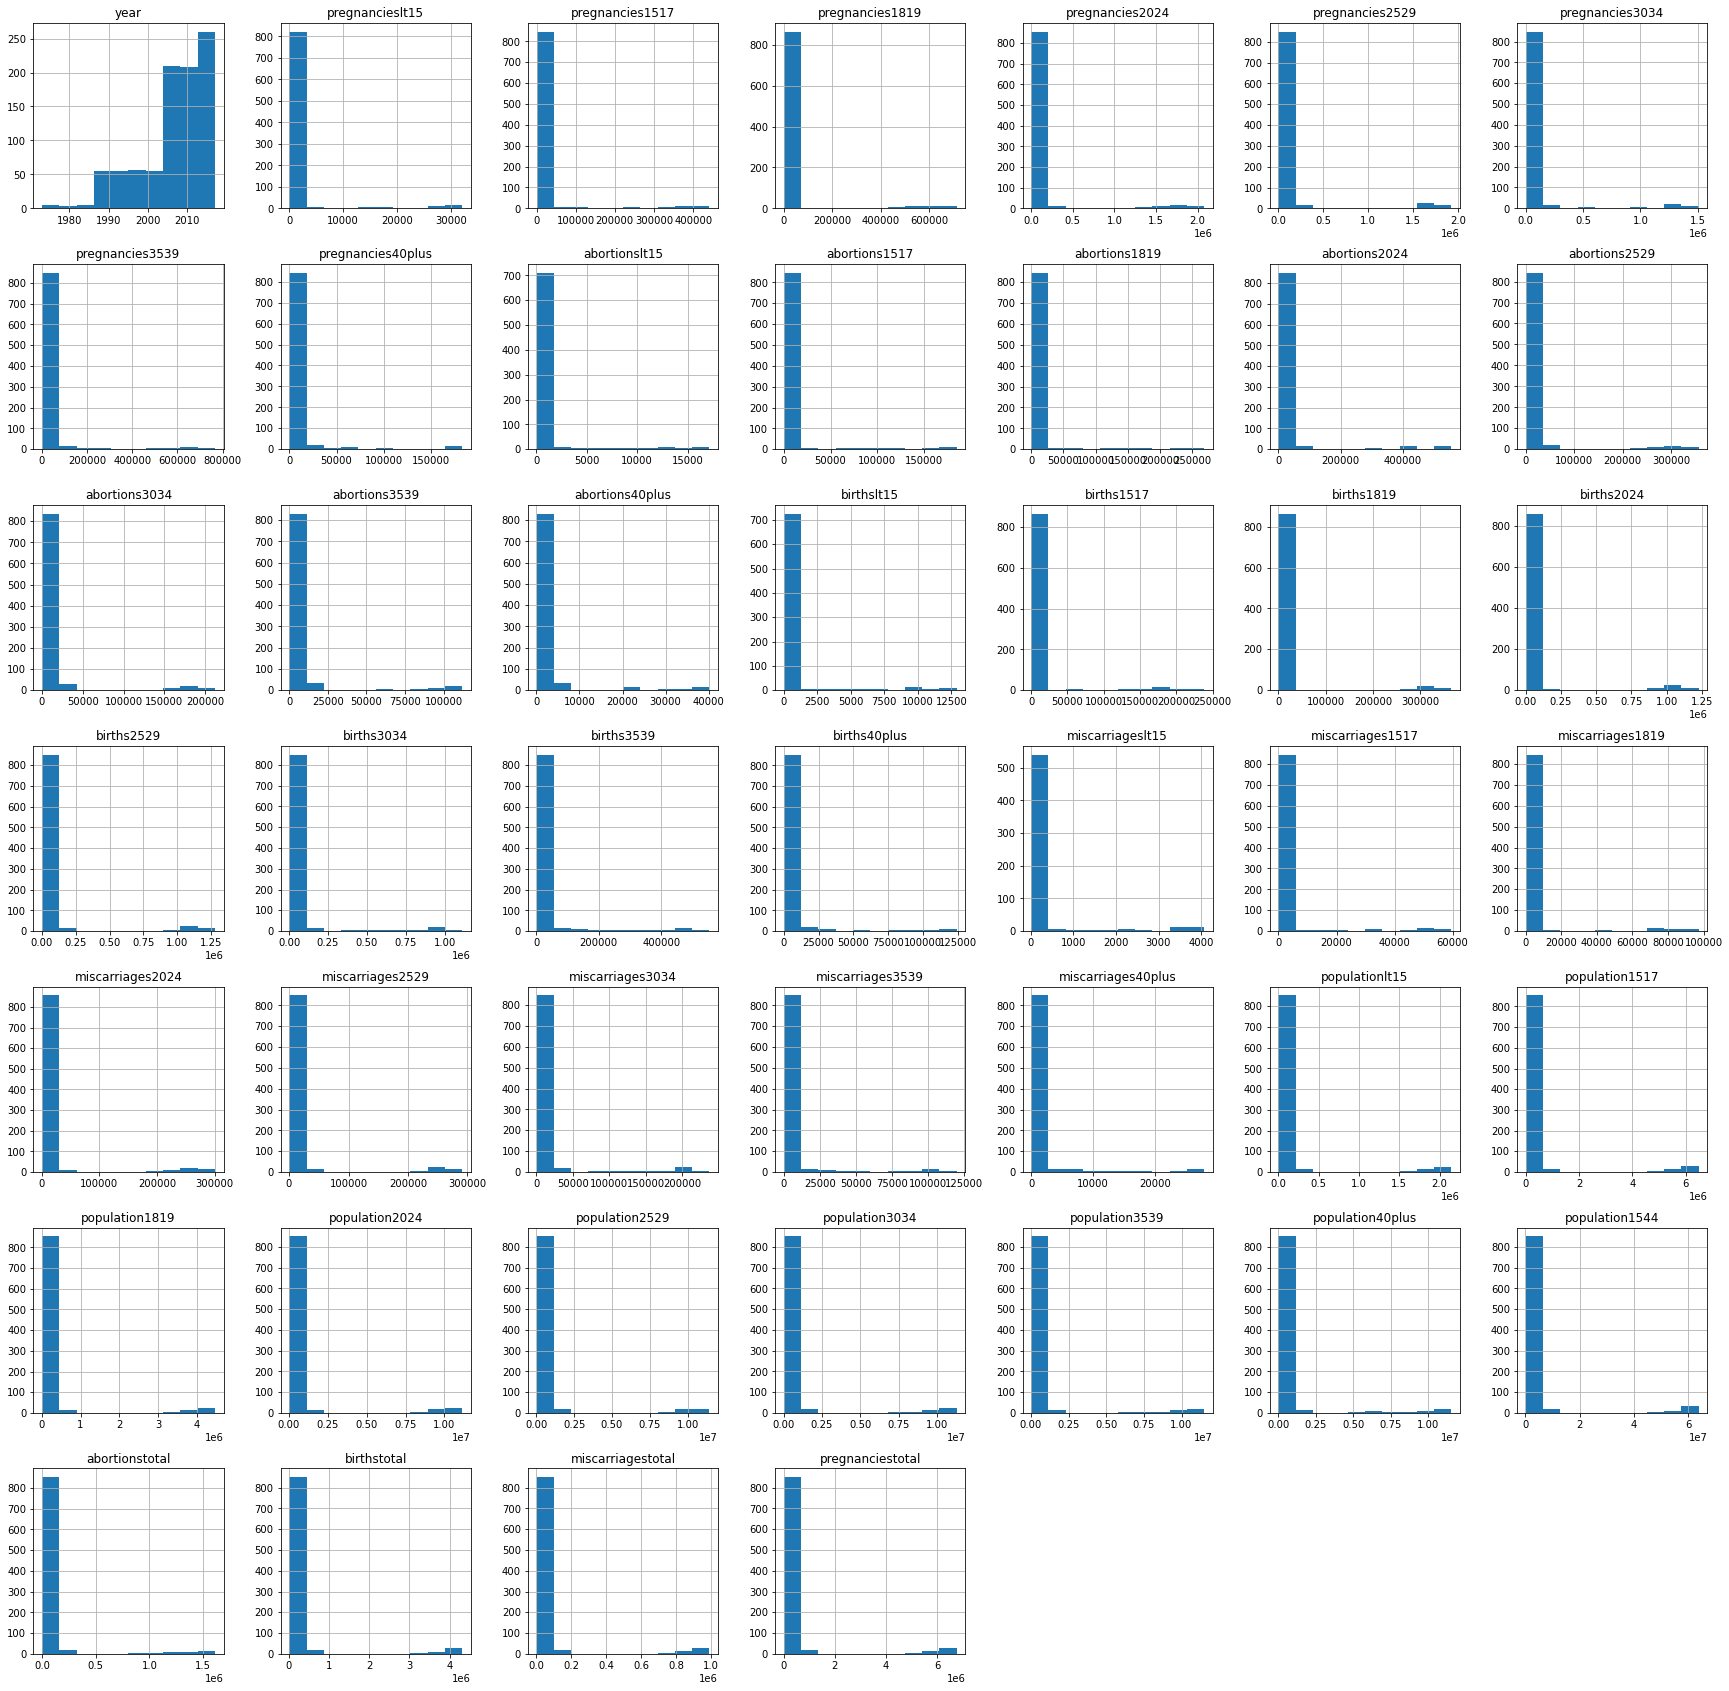

In [232]:
data.select_dtypes([np.number]).hist(figsize=(30,30))
plt.show()

In [233]:
#Random Sampling of Data
indices = [50,90,120]

In [236]:
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print("Randomized Data Set of Motality Statistics Conerning Abortion:")
display(samples)

Randomized Data Set of Motality Statistics Conerning Abortion:


,state,year,pregnancieslt15,pregnancies1517,pregnancies1819,pregnancies2024,pregnancies2529,pregnancies3034,pregnancies3539,pregnancies40plus,...,population2024,population2529,population3034,population3539,population40plus,population1544,abortionstotal,birthstotal,miscarriagestotal,pregnanciestotal
0,AZ,2017,80.0,1860.0,5540.0,26770.0,33890.0,27430.0,13910.0,3380.0,...,233459,242622,222486,219908,207334,1354855,13270,81872,17700,112840
1,CO,2006,230.0,3730.0,7220.0,25630.0,26940.0,22420.0,12390.0,2840.0,...,164229,164307,161002,168682,178746,997392,14990,70751,15650,101400
2,DE,1992,110.0,1070.0,1480.0,4940.0,5060.0,3680.0,1280.0,240.0,...,28176,29062,31277,28916,25230,164218,4620,10656,2590,17870


In [ ]:
#Heatmaps

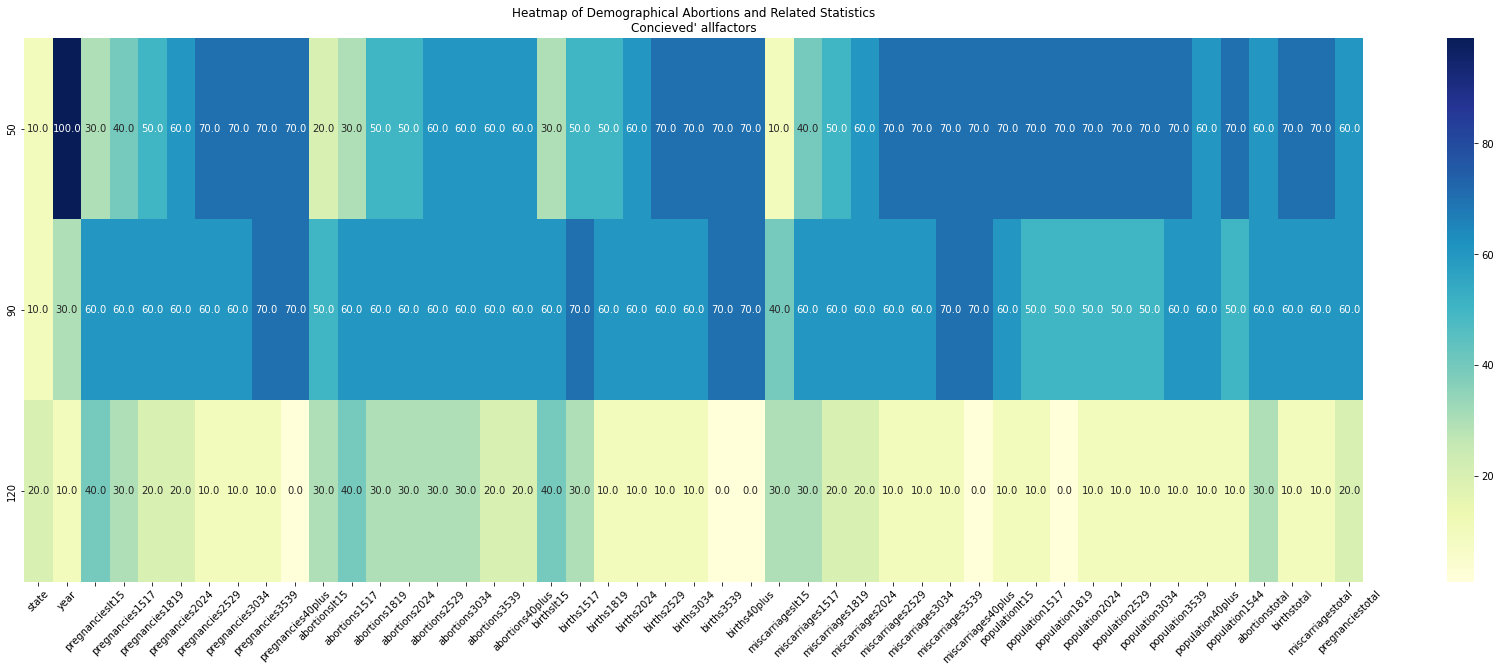

In [237]:
plt.figure(figsize=(30,10)) #hot to resize chart to be readable


pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=1)
#Percentiles with heatmap

sns.heatmap(pcts, annot=True, vmin=1, vmax=99, fmt='.1f', cmap='YlGnBu')
plt.title('Heatmap of Demographical Abortions and Related Statistics\nConcieved\' allfactors')
plt.xticks(rotation=45, ha='center');

#In viewing the heatmap below the recorded number women that rank above the 90th percentile for conception at some 
#time showcasing overtime the changing attitudes and need for abortion as access and care throught the United States.
#These features pregnacy, abortion, miscarrages and overall population showcase that women in the US population
#harness this type of healthcare. Emphasis on having a large sample size over decades shows that the population rises 
#in conjuction with appropriate ages and accessibility given the year. 

In [238]:
#KCluster

In [239]:
x, y = DataGenerator.figure2()

print([round(i, 3) for i in x])
print([round(i, 3) for i in y])

[0.0, 0.111, 0.222, 0.333, 0.444, 0.556, 0.667, 0.778, 0.889, 1.0]
[-5.0, 0.263, 1.897, 2.692, 3.163, 3.475, 3.696, 3.861, 3.989, 4.091]


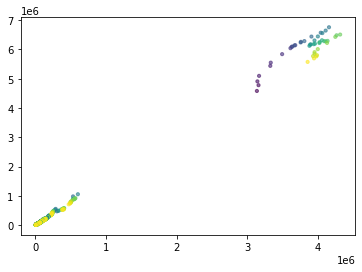

In [240]:
plt.scatter(data.birthstotal, data.pregnanciestotal, c=data.year, alpha = 0.6, s=10)

Text(0, 0.5, 'abortionstotal')

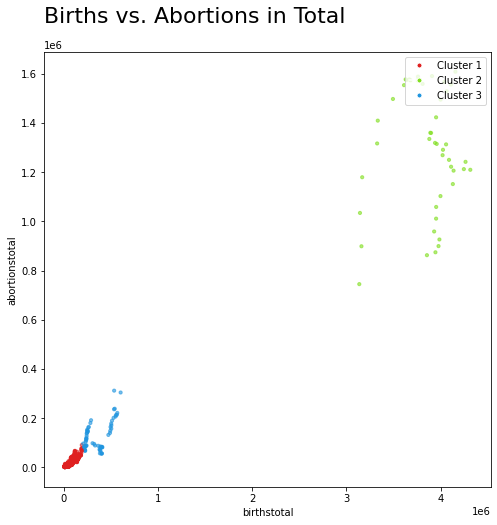

In [241]:
#Creating a Two Dimensional Cluster

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['birthstotal', 'abortionstotal']])
# Get Centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## Add Data
data['cen_x'] = data.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data['cen_y'] = data.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data['c'] = data.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#Plot Library
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(8,8))
# Plotting Data
plt.scatter(data.birthstotal, data.abortionstotal, c=data.c, alpha = 0.6, s=10)

#Create a List of Legend Elements
#markers & records
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
#Lengend
plt.legend(handles=legend_elements, loc='upper right')
#Input title & labels
plt.title('Births vs. Abortions in Total\n', loc='left', fontsize=22)
plt.xlabel('birthstotal')
plt.ylabel('abortionstotal')


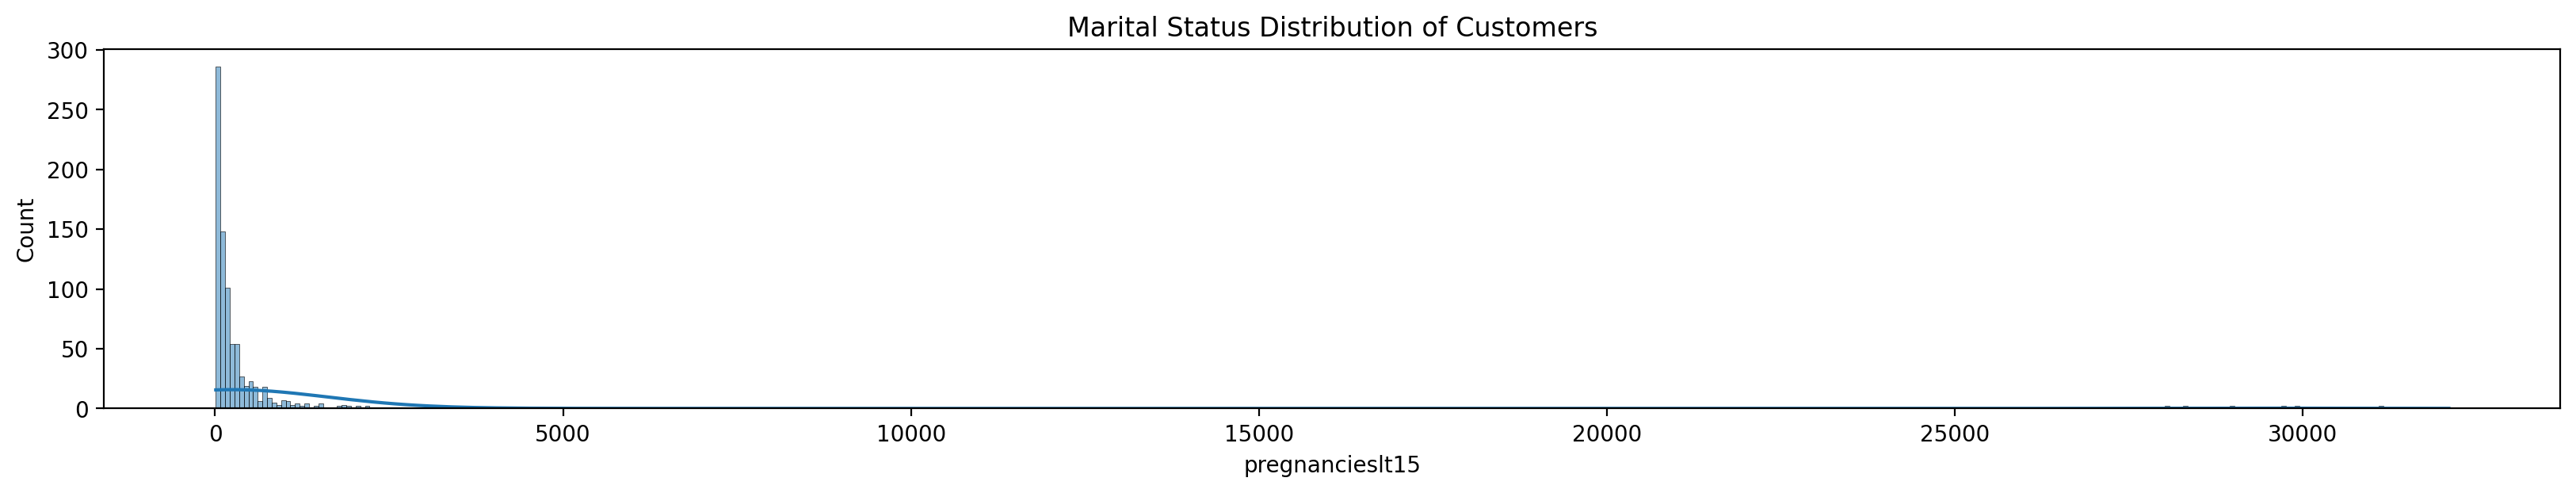

In [242]:
plt.figure(figsize=(20,3),dpi=200)
sns.histplot(data=data,x="pregnancieslt15",kde=True)
plt.title("Marital Status Distribution of Customers")
plt.show()

/Users/testuser/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pregnancieslt15'>

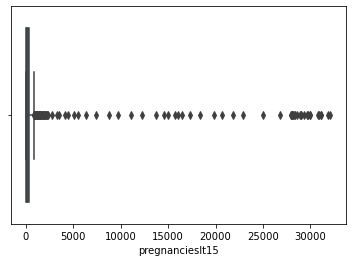

In [243]:
sns.boxplot(data['pregnancieslt15'])

In [244]:
# Categorize Data by Numerical or Categorical for Analysis
numerical = data[['birthstotal','pregnanciestotal','abortionstotal', 'miscarriagestotal', 'year']]
categorical = data[[ 'state']]

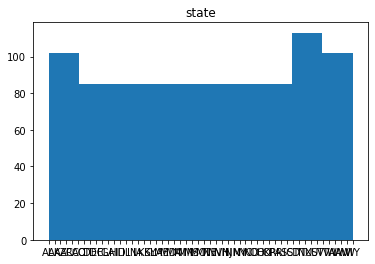

In [245]:
for i in categorical.columns:
    plt.hist(categorical[i])
    plt.title(i)
    plt.show()

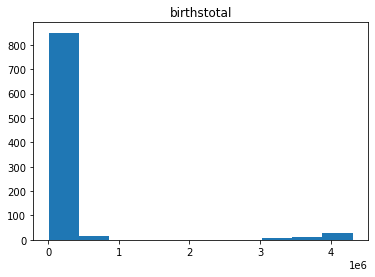

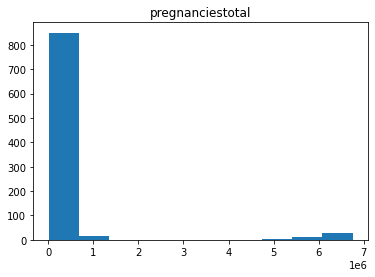

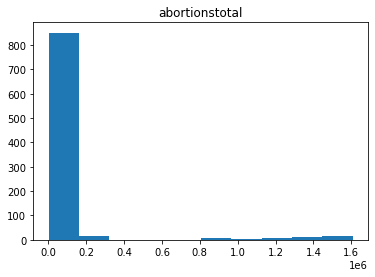

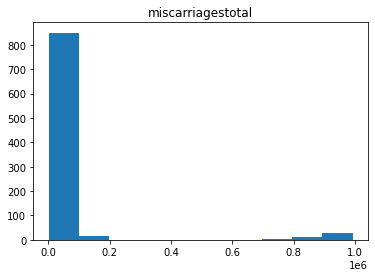

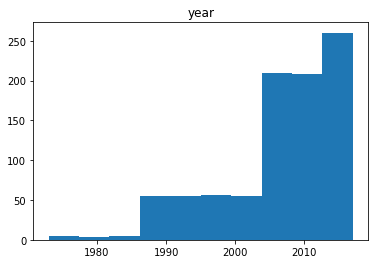

In [246]:
for i in numerical.columns:
    plt.hist(numerical[i])
    plt.title(i)
    plt.show()

In [247]:
#Kmeans Clustering

In [248]:

X, y_true = make_blobs(n_samples = 500, centers = 27,
            cluster_std = 0.40, random_state = 0)

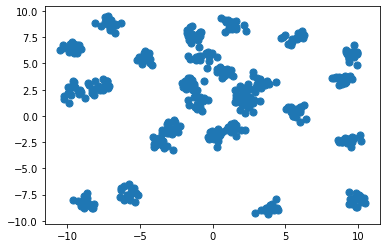

In [249]:
plt.scatter(X[:, 0], X[:, 1], s = 50);
plt.show()

In [250]:
kmeans = KMeans(n_clusters = 27)


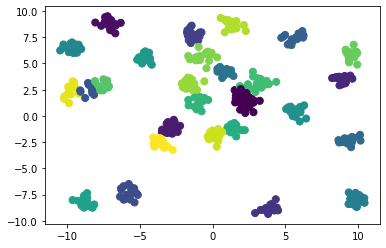

In [251]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_

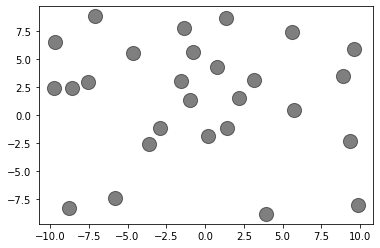

In [281]:
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

In [ ]:
#Performance Evaluation Metrics:Rand Index, Adjusted

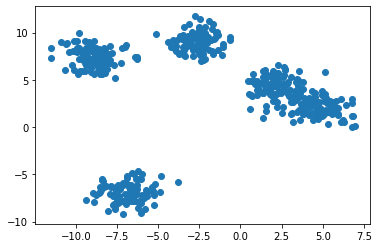

In [293]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

feature, target = make_blobs(n_samples=500,
							centers=5,
							random_state=42,
							shuffle=False)
plt.scatter(feature[:, 0], feature[:, 1])


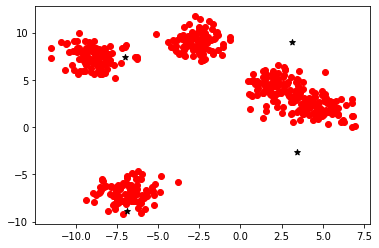

In [296]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(feature)
plt.scatter(feature[:, 0], feature[:, 1], color="r")
plt.scatter(model.cluster_centers_[1],
			model.cluster_centers_[3],
			color="k", marker="*")
plt.scatter(model.cluster_centers_[2],
			model.cluster_centers_[0],
			color="k", marker="*")


In [297]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(target, model.labels_)
print(ari)
#According to the parameters for the Rand Index in an agjusted setting this is a good output because the scale that 
#that this index is measured on is -1 to 1, the closer the output is to one.

0.7812362998684788


In [ ]:
#KMeans Performance Evaluation Metrics

In [306]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [307]:
scaled_features[:10]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446],
       [-0.6091802 , -0.96748146],
       [-0.27382069,  1.20384743],
       [-1.23815784, -1.11763029],
       [ 1.0309618 ,  1.14757573],
       [-0.57532971, -0.95983806]])

In [308]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [309]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [310]:
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_

2

In [311]:
kmeans.labels_[:10]


array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1], dtype=int32)

In [314]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 1000,
    "random_state": 50,
}

#init controls: the initialization technique, it is a randomized
#n_clusters: sets k for the clustering step. This is the most important parameter for k-means, we have choosen 4 
#clusters based off of our mortals 
#max_iter: sets the number of maximum iterations



In [254]:
# Fitting K-Means to data
clust_model = KMeans(n_clusters=27, random_state=50)
clust_model.fit(X)


KMeans(n_clusters=27, random_state=50)

In [ ]:
#Silhouette Performance Evaluation Metrics

In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

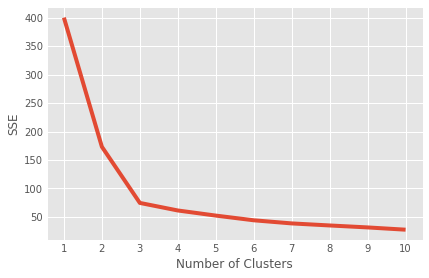

In [321]:
plt.style.use("ggplot")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [322]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow


3

In [323]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 4 clusters for silhouette coefficient
for k in range(4, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

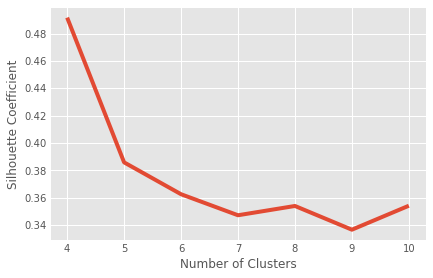

In [327]:
plt.style.use("ggplot")
plt.plot(range(4, 11), silhouette_coefficients)
plt.xticks(range(4, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [298]:
ss = silhouette_score(feature, model.labels_)
print(ss)

0.7328381899726921


In [ ]:
#CONCLUSION
#The predictive analsysis shows that the models selected are good gleaning scores of 0.64236299868726459,
#0.7812362998684788, and 0.7328381899726921 respectively.  This means that in evaluating abortionstotal, 
#populationtotal, marriagestotal, it can be reasoned that the trends that rates for all will continute to decline will
#maintain through analysis.
